In [21]:
import ternausnet
import ternausnet.models
import numpy as np
from PIL import Image
import io

import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim import Adam
import matplotlib.pyplot as plt

In [22]:

def load_model(path, device='cpu'): # Check for GPU or CPU
    x = ternausnet.models.UNet11(pretrained=True) 
    model = x
    optimizer = Adam(model.parameters(), lr=0.001)
    checkpoint = torch.load(path, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    model = model.to(device)

    return model


In [23]:

def get_masked_image(uploaded_file, model, device='cpu'): # Check for GPU or CPU
    input_image = Image.open(uploaded_file)
    if input_image.mode != 'RGB':
        input_image = Image.merge("RGB", (input_image, input_image, input_image))
    transform = transforms.Compose([
        transforms.ToTensor(),

    ])
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    model.eval()  
    with torch.no_grad():
        output_tensor = model(input_tensor)
        output_tensor = torch.sigmoid(output_tensor)
    output_numpy = output_tensor.squeeze().cpu().numpy() # Check for GPU or CPU
    print(np.unique(output_numpy, return_counts=True ))
    output_numpy = (output_numpy).astype(np.uint8)
    output_image = Image.fromarray(output_numpy * 255)

    return output_image


In [24]:


def mask_images(uploaded_files, checkpoint_path, device):
    segmented_files = []
    model = load_model(checkpoint_path, device)
    for uploaded_file in uploaded_files:
        segmented_file = get_masked_image(uploaded_file, model, device)
        segmented_files.append(segmented_file)
    return segmented_files

(array([0.0000000e+00, 3.0193708e-39, 3.0339639e-39, ..., 9.9999976e-01,
       9.9999988e-01, 1.0000000e+00], dtype=float32), array([57581,     1,     1, ...,    12,    33,  4203], dtype=int64))


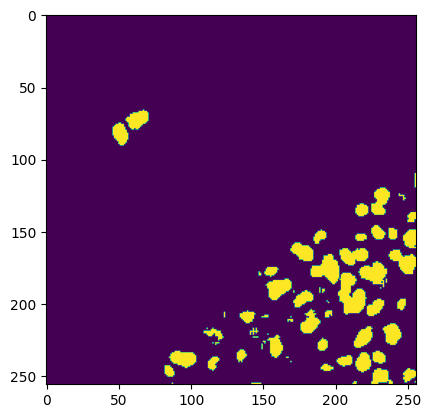

In [26]:

model = load_model('model/model_2.pth')
input_image_path = 'statics/sample_image.png'
output_image = get_masked_image("C:/Users/DELL/Desktop/DLA/Hackathon/WebApp/statics/028.png", model)
plt.imshow(output_image)
plt.show()